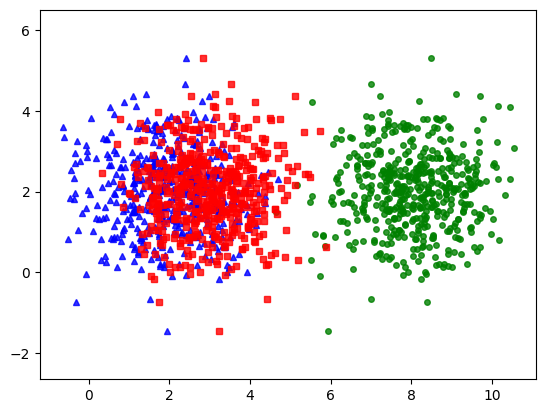

In [15]:
#toy example
from __future__ import print_function
import numpy  as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

means = [[2,2], [8,3], [3,6]]
cov = [[1,0], [0,1]]
N = 500

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3
original_label = np.asarray([0]*N+[1]*N+[2]*N).T



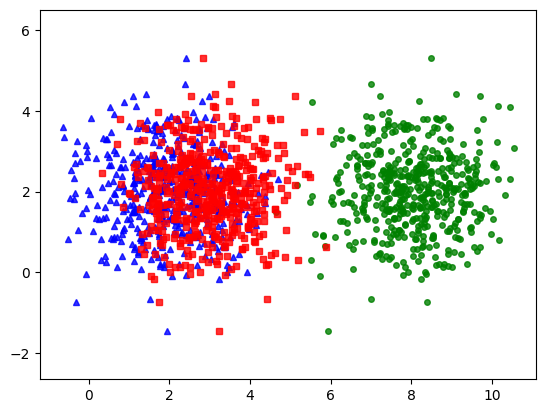

In [48]:
def kmeans_display(X, label):
    K = np.amax(label)
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X0[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X0[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

Kmeans_display(X, original_label)

### Các hàm số cần thiết cho K-means Clustering

In [51]:
# k-means_init_centers để khởi tạo cá centes ban đầu
# k-means_asign_labels để gán nahx mới cho các điểm khi biết các centers
# k-means_update_centers để cập nhật cá centers mới dựa trên dứ liệu vừa đucợ gán nhãn
# has_converged để kiểm tra điều kiện dunegf của thâutj toán
def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k, :] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
     return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))


In [53]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X,K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)


Centers found by our algorithm: 
[[8.0410628  3.02094748]
 [2.9898012  6.03271696]
 [1.9780868  2.0065323 ]]


ValueError: x and y must have same first dimension, but have shapes (500,) and (499,)

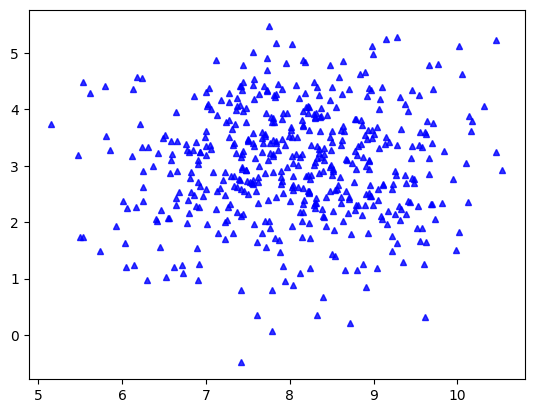

In [57]:
(centers, labels, it) = kmeans(X, K)
print("Centers found by our algorithm: ")
print(centers[-1])

kmeans_display(X, labels[-1])
